<a href="https://colab.research.google.com/github/Olesiewitch/Predictive_Analytics/blob/master/Implementation_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heterogeneous treatment effect estimation 

### Predictive Analytics Seminar SoSe 2020

\\

Authors : Li Zhi (601150) \& Malgorzata Paulina Olesiewicz (598939)

# Table of contents
1. [Introduction](#introduction) \\
  1.1 [ CATE ](#cate) \\
  1.2 [Uplift](#uplift)

2. [Direct and Indirect Models](#models) \\
    2.1  [ Direct Models](#direct) \\
    2.2 [ Indirect Models](#indirect)

3. [Python Packages](#packages) \\
   3.1.[Comperative Review](#review) \\
   3.2.[Discussion](#discussion) \\

4. [Use cases](#implementation) \\
   4.1 [Data & simulation methods](#data) \\
     4.1.1. [Uplift case](#uplift_data) \\
     4.1.2. [CATE case](##cate_data) \\
   4.2 [Examples of the implementation](#examples) \\
      4.2.1. [PyLift](#pylift) \\
      4.2.2. [CausalML](#causalml) \\
      4.2.3. [DoWhy](#dowhy) \\
      4.2.4. [EconML](#econml) \\
      4.2.5. [CausalLift](#causallift) \\
      4.2.6. [PyUplift](#pyuplift)
5. [Conclusion](#paragraph3)
6. [References](#paragraph4)





## 1. Introduction <a name="introduction"></a>
\\

\\

 \\
 \\


 \\

\\

#### 1.1 Conditional Average Treatment Effect  <a name="cate"></a>
\\

\\

 \\
 \\


 \\

\\

#### 1.2 Uplift  <a name="uplift"></a>
The second metric that will be discussed is the uplift, which predicts the incremental effect of a treatment on the outcome of an individual. It is often used in the context of binary outcomes such as purchase, visit to the website or employment status. The objective of the uplift modelling is to maximise the return/gain from the treatment and reach the equalibrium with resepct to the treatment cost. 

To find optimal faction of the population which should be targeted by the treatment, first the lift for every observation in the sample needs to be calculated. Lift is defined as a change in the probability of an outcome given treatment in comparison to no treatment. 

 \\

$$Lift = P\ (outcome \ |\ treatment) - P\ (outcome \ | no\ treatment)$$
 
 \\

The sub-group of the population with the highest lift is often called the *persuadables* and is responsive to the treatment. By targetting only this group one maximises the return and minimise the cost, since treatment brings the desired result of the change in the outcome. Targetting *sure things* or *lost causes* will bring no change in the outcome and can be associated with an additional cost of the treatment. Moreover, one wants to avoid targeting the *sleeping dogs* as this will bring the opposite to the intended by the treatment results. Consequently, the objective of the uplift models is to identify the *persuadables*. 

The summary of the different population groups can be found in the figure below. 

\\
<center>

**Picture 1 : Population subgroups with respect to their treatment status**

<img src="https://storage.googleapis.com/wf-blogs-engineering-media/2018/10/e45e2d97-confmatrix_alt-768x768.png"
     alt="Persudables"
      width="250" height="250"/>

   Graphic Source: https://tech.wayfair.com/
 </center>    

    
   
    


## 2. Direct and Indirect Models  <a name="models"></a>
Models which can be used to estimate both CATE and Uplift can be divided into two categories : direct and indirect. The list of models belonging to both groups can be found in Table 1. 

The direct approaches are mostly tree based where CATE or uplift is calculated based on the obervations in each leave, directly from the data. The models in this category differ in how split is conducted to grow the tree and how the within each tree estimates are combined to calculate the final CATE or Uplift. 

The indirect models can be divided into the meta learners and transform outcome models. In both cased, indirect model essentially reformulates the uplift or CATE estimation into a different kind of problem (set of problems) and uses existing machine learning models to solve these “translated” problems. 


Both groups of the models are discuss in more detail in the following sections. 


***Table 1 : List of direct & indirect models***

|Direct Models | Indirect  Models |
| --- | --- |
| Information Theory Based Trees <br><br> Causal Conditional Inference Trees <br><br> Context treatment selection (CTS) <br><br> Generalized Random Forest | S-Learner <br><br> R-Learner <br><br> X-Learner <br><br> T-Learner <br><br> Transformed  <br> Outcome

### 2.1 Direct  Models  <a name="direct"></a>
In the direct models approach we are using the algorithms to directly optimise for the uplift or CATE . In case of the tree based models, we optimise for the metric of interst at every split. Estimates of each tree can be combined together using ensable methods to obtain more stable prediction. Picture 2 shows a simple conceptual visualisation of a decison tree for the uplift problem. 

<center>

**Picture 2 :**

<img src="https://storage.googleapis.com/wf-blogs-engineering-media/2019/10/fe4e20b1-header-image.png"
     alt="Persudables"
      width="525" height="300"/>

   Graphic Source: https://tech.wayfair.com/
 </center>    
 \

The split is conducted to optimise the pre-defined for the model performence metric e.g. divergence gain (see Table 2). Each node of the tree must contain observation from both (all) groups in order for the model to be able to calculate estimated CATE / uplift at each step. 
 
 \\

|Conceptual pseudo-code for the direct tree-based models |
--- |
***1.*** Pre-define the performence criterium for the split <br> ***2.*** Grow the tree in a greedy fashion : <br> <br> ***a)*** Optimise each split using the pre-defined criterium <br> ***b)*** Allow for the split only if both of the children nodes contain  observations from treatment and control groups <br> ***c)*** Stop if the stopping criterium has been reached  <br> ***d)*** Obtain the estimates for CATE or uplift within each leaf <br> <br> ***3.*** If using an ensable methods combine the estimates form all the trees to obtain the final estimate.  

  \

The summary of most commonly used direct models for the heretogenouse treatment effect estimation can be found in Table 2.




***Table 2 : Comperative review of direct models***

Method | Authors | Method description | Advantages | Disadvantages 
 --- | --- | --- | --- | --- 
Information Theory <br> Based Trees   | Rzepakowski & <br> Jaroszewicz (2012) | The tree is grown by maximizing the distance in the <br> class distributions of the response. The splits are <br> evaluated based  on the **Divergence Gain**.  There are <br> three different distribution  divergence measures, <br>  which can be used in the model :<br> <br> - Kullback-Leible <br> - Squared Euclidean <br> - Chi-squared |- Information Theory Based Trees are still<br> wildly  used in practice <br> <br> - Their methodology was a stepping stone <br>  in the development of many following <br>  methods | - Empty control group makes causal inference <br> not possible <br> <br> - Splitting conditions are independent of population size,<br> which may cause problems when dealing with real world <br>data 
Causal Forest | Athey, et al (2015) | The tree is grown using the exact loss criterion and  <br> nearest neighbor  approximation. Within each leaf a <br>  **propensity score weighted two model**  approach is <br> used to obtain the treatment effect. The final <br> estimate is an average of the all the trees. <br>| - Inference is straight forward due to the <br> honest  tree assumption  and normality of <br> Causal Forest | - Due to nearest neighbor approach, individual treatment <br> effects still unobtainable <br> <br> - Model performs well only in high dimensions
Context Treatment  <br> Selection (CTS)| Zhao, et al (2017)  | Model allow estimation of the **expected response <br> under each treatment**, which leads to optional <br>  treatment selection. The tree is grown with each <br> split directly maximizing the expected response <br> (lift).  Model allows partition of the feature space.| - Allows to model multiple and continuous <br>  response treatments <br> <br> - Shows significant improvement in <br> performance  for symmetric data |
Generalized  <br> Random Forest | Wager & Athey (2018) | Tree is grown with splitting using  **gradient loss <br> criterion** and  pseudo-outcomes. **Honest problem- <br> specific split** improves the accuracy of the model <br> and assures its unbaisness. The estimated <br> treatment effect is derived using the estimating <br> equation weighting scheme.| - Model can better express treatment <br> heterogeneity than Causal Forest <br> <br> - Model can be use for any heterogeneous  <br> parameters prediction estimation  <br> such as Quantile Regression. |  -  Bias confidence intervals <br> <br> - Model performs well only in high dimensions <br> <br> - Prediction unstable around the edge of the <br>parameter space


## 2.2 Indirect  Models  <a name="indirect"></a>

###**Notations**
The following 

In comparison to direct models, Indirect models estimate treatment effects indirectly, using one or more models of the observed outcome, or via some transformation on treatment and responses classes.  In the following section, we discuss two main classes of indirect approaches, namely, the **Meta-learner family** (Kunzel etl 2019, Nie and Wager 2017) and the **Transformed outcome model** (Kane et al. and Lai’s article).
  

###**Meta Leaners**
A meta learner is a framework that builds on some base learner, such as Random forests, Bayesian additive regression trees, or neural networks to estimate the CATE.

* **T-learner** is the most standard model, also often called two-model approach in other literatures. It predicts the target outcome with and without treatment, and takes the difference between the predicted outcomes to derive the impact of a treatment. It follows two stages: 

Stage 1: to estimate the average outcomes 
\begin{array}{l}
\mu_{0}(x)=E[Y(0) \mid X=x] \\
\mu_{1}(x)=E[Y(1) \mid X=x]
\end{array}      Stage 2:
Take the difference in conditonal menans to calculate the CATE estimate as:
$$\hat{\tau}(x)=\hat{\mu}_{1}(x)-\hat{\mu}_{0}(x)$$

T-learner is very straightforward and easy to implement, and it tends to be more effective when the treatment effect is very complicated - when there is not much commen trends between the control and the treatment group. However, the downside is that both two models need to be accurate to make the estimate more realiable. 

* **S-learner** estimates the treatment effect using a single machine learning model,including the treatment indicator as a covariate into the model. We could estimate the average treatment effect on the population through standard regression analysis. The formular of calculating CATE is
 $$\hat{τ_s(x)}=\hat{μ(x,1)}-\hat{μ(x,0)}$$  

Intuitively, this single estimator avoided the amplified error problem as presented in T-learner, since there is only one model to consider. Empirically, it is suitable when the treatment effect is simple, so by treating the treatment indicator as other covariates have proved to be more effective. 

As pointed out in Kunzel's paper, however, S-learner tend to bias the estimate to 0. For example, when base algorithms such as the Lasso and RFs are used, the treatment indicator could be ignored by not choosing or splitting. In that case, the CATE estimates would be biased to 0. 

* **X-learner**, is an extension of T-learner. It uses imputed treatment effects and weighted average to estimate CATE. 
Three stages are as follows:    

*Stage 1*: 
Estimate the average outcomes just as T-learner
\begin{array}{l}
\mu_{0}(x)=E[Y(0) \mid X=x] \\
\mu_{1}(x)=E[Y(1) \mid X=x]
\end{array}   

*Stage 2*:   
Impute the treatment effects,$\quad {D}_{i}^{1}$, and $\quad {D}_{j}^{0}$ for individual i in the treatmnet group based on $\mu_{0}(x)$, and individual j in the control group based on $\mu_{1}(x)$:

$\quad{D}_{i}^{1}=Y_{i}^{1}-\hat{\mu}_{0}\left(X_{i}^{1}\right),\text {and}
\quad{D}_{i}^{0}=\hat{\mu}_{1}\left(X_{i}^{0}\right)-Y_{i}^{0}$  
then construct a treatment estimate for the treatment and control group separately: $\tau_{1}(x)=E\left[D^{1} \mid X=x\right], \text { and } \tau_{0}(x)=E\left[D^{0} \mid X=x\right]$  

*Stage 3*:  
Combining the treatment effect estimates from both models using a weighted average: 


$: \quad \hat{\tau}(x)=g(x) \hat{\tau}_{0}(x)+(1-g(x)) \hat{\tau}_{1}(x)$



 X-learner has advantages when there is assumptions on structural property of the CATE (its sparsity or smoothiness, for example). Moreover, especially in the setting where the treatment and control group vary in size, X-learner performs more effectively. 
:
* **R-learner** uses the cross-validation out-of-fold estimates of outcomes and propensity scores. As explained in Nie(2017)paper, a transformed loss function was constructed, and the problem became minimizing R-loss function:
$\underset{\tau}{\arg \min } \frac{1}{n} \sum_{i}\left(\left(Y_{i}-E\left[Y \mid X_{i}\right]\right)-\left(T_{i}-E\left[W=1 \mid X_{i}\right]\right) \tau\left(X_{i}\right)\right)$  

A short summary of each learner along with Pseudocode is presented in the following Table 3. 

***Table 3***

Type | Pseudocode | Advantages & Disadvantages
--- |:--- :| --- :
**T-learner** |               |**A**:It is straightforward to implement. <br> <br>**D**:It often results in different sets of predictor variables; <br>It requires high accuracy in both models.
**S-learner** |               |**A**: Suitable when the treatment effect is simple. <br> <br>**D**: Could be biased towards 0.
**X-learner** |              |**A**:It adapts to structural properties of the CATE; <br>    It is more effective when sample size between treatment and control group are equal.
**R-learner** |              |**A**: It is more flexible and easy to use as it could apply any loss-minimization method in both steps; <br> The methods can be fine-tuned by cross validation


###**Transformed Outcome**

Transformed outcome model is another indirect approach used for the calculation of the uplift which has been created by Athey and Imbens (2016). 

The idea is quite simple; the outcome labels are transformed in such a way that taking their expectation is equivalent to estimating the uplift. 

Transformation of the outcome is conducted using following formula:
\begin{equation}
    Y^{*}=Y \frac{W-p}{p(1-p)}
\end{equation}

where $Y^{*}$ is the Transformed Outcome,  $Y$ is the outcome (1 or 0),  $W$ indicates the presence of a treatment (1 or 0), and $p=P(W=1$).

For  $p=0.5$ the positive outcome 1 (e.g buy) is trnasfored to -2 for those in control group and 2 for those in treatment. The negative outcome label in both groups remain 0.

The main advetage of this transformation is that by taking average of the transformed otcomes within the sample is equivalent to esimating the lift. 

This can be easily illustrated by an example with a simple size of 2n, where half of the sample is randomly assigned to the treatmeant (t) and the other half to the control (c) group. For each observation, the original and transformed outcomes are denoted by $y_{i}$ and $y^{*}_{i}$ ,  respectively. Consequently, we can write down the list equasion as : 

  \begin{align*} \text{Lift} &= E[y|t] - E[y|c] = \frac{1}{n} \sum_{i=1}^n y_i - \frac{1}{n}\sum_{i=n+1}^{2n} y_i = \frac{1}{2n} \left[ \sum_{i=1}^{n} 2y_i - \sum_{i=n+1}^{2n} 2 y_i \right] = \frac{1}{2n} \sum_{i=1}^{2n} y^{*}_{i} = E[y^{*}]. \end{align*}

And futher, conditioning on $x$ we will allow us to obtain the uplift for the relevant subsample. The implementation of this model into the package has been conducted by the Wayfair company and more information regsrding its technical implementation can be found on their [blog](https://tech.wayfair.com/data-science/2018/10/pylift-a-fast-python-package-for-uplift-modeling/).


## 3. Python Packages <a name="packages"></a>
\\

#### 3.1 Comperative review  <a name="review"></a>
There are several Python Packages available for causal modeling and we have reviewed the following:
* CausalML 
* PyLift
* DoWhy
* EconML 
* CausalLift
* PyUplift 

In order to review relevant packages the following aspects have been considered: ***functionality, interpretability of the results*** and ***user-friendliness***. 


All the technical aspects of the packages such as available algorithms, flexibility and additional features were considered under functionality aspect. When reviewing interpretability, we focuses on the avaiable by default evaluation methods and results. Finally, user-friendliness was evaluated based on documentation, interface and level of aditional expertees required to use the package. The summary of packages' features can be found in Table 4. The discussion of advantages and disadvantages of each package can be found in section 3.2. 
 
 \\

***Table 4 : Python packages for causal modelling : comparison of the features***

Feature \ Package | CausalML |PyLift | DoWhy |EconML |CausalLift|PyUplift|
 --- | :-:| :-: | :-: | :-:| :-: | :-:|
 **FUNCTIONALITY** |||||| |
  **Heterogeneous treatment effects  applications:** ||||||
CATE |||✓|✓|✓| 
Uplift|✓|✓|||✓|✓
 **Types of treatment supported:**||||||
Single |✓|✓|✓|✓|✓|✓|
Multiple|✓|||✓||
Binary|✓|✓|✓|✓|✓|✓
Continouse||||✓||
**Implemented Models:**||||||
*Indirect algorithms:* ||||||
S-learner |✓|||✓|||
T-learner|✓|||✓||
X-learner|✓|||✓|||
R-learner|✓|||✓||
*Direct algorithms:* ||||||
Information Theory Based Trees |✓|||✓|||
Orthogonal Random Forest||||✓||
CTS |✓||||||
Transformed Outcome Model||✓||||
*Other algorithms:* ||||||
Propensity-based Stratification|||✓||||
Propensity Score Matching|||✓|||
Inverse Propensity Weighting |||✓||||
Regression |||✓||✓||✓
Two model approach|||||✓||
**Other features:** ||||||
Direct connection to data API||||||✓
**INTERPRETABILITY** ||||||
*Evaluation methods:* ||||||
Gini Curve|✓|✓||✓|||
Conversion rate|||||✓||
Feature importance|✓|✓|||||
Tree visualisation |✓|||✓|||
Causal graphs |||✓||||
**USER FRIENDLINESS** ||||||
Documentation is completed |✓|✓|✓|✓|||
Tutorial notebooks are avaiable |✓|✓|✓|✓|✓||
Specific version of supporting packages required  |✓||||||
Package is beginner friendly ||✓|✓||✓|✓|




#### 3.2 Discussion  <a name="discussion"></a>

As it can be clearly seen from the Table 4, the functionality and scope of potential application vary among the packges sygnificantlly. 

 Two the most advanced packages, CausalML and EconML have been developed by Uber and Microsoft respectively. DoWhy is also a product of Microsoft, however focused more on the traditonal models used in empirical research such as IV. Therefore, it is important to note that the resources avaiable for the development of those packages by far exceed any other package on our list. 

***CausalML*** and ***EconML*** implemented most of the disscused in the section 2 models and allow for simulatiouse multiple treatment effects analysis. The visualisation of the trees and the policy interpreter in EconML allows for intuative presentation of the results. However, both of the packages are very advanced and require additional knowlage of sklearn in order to be able to navigate through them. Moreover, CausalML require specific version of the supporting packages, which may cause some issues during inicial instalation. Finally, the visualistion tool should be extended also to the metalearners.

***DoWhy's*** biggest advantage is the implementation of the causal graphs for the treatment models. It allows for a clear interpretation of the causal effect and prevents from fauls model stucture such as conditioning on colliders. Depending on the model one wants to use, the package can be a great fit for CATE estimation but is not suitable for uplift modeling. 


***Pylift*** has been developed by Wayfair, which is another privet company. The package as the only one for the listed above implemented the transfored outcomes method developed by Athey and Imbens. It is a very easy and intuative package to use for a beginner in the uplift modeling. However, it is rather a 'black box' with a limited results avaible to the user. Moreover, only the default learners are working well (switching to any other learner was causing error) and limited documentation forbids from further adjustments. 

Finally, ***CausalLift*** and ***PyUplift*** are two packages that have been developed as part of university research projects are very limited in functionality. CausalLift ofers output which is intuative for interpretation (e.g table showing estimated CATE for each observation). PyUplift offers direct connection to the API with datasets used for uplift modelling such as Hillstrom EmailMarketing and Criteo. Unfortunatly, both of the packages have very limited documentation. Moreover, PyUplift only returns the predicted values for the test set, no sorting or optimal target subgroup implemented.  
Therefore, we would not recommend using those packages. 

#### 4. Use cases  <a name="implementation"></a>

#### 4.1 Data & simulation methods  <a name="data"></a>
\\

#### 4.1.1. Uplift case  <a name= "uplift_data"></a>


We use the classic Hillstrom dataset for application in **CausalML** and **PyLift** Packages. 

**Brief data description:**  
Data set contains 64,000 customers who last purchased within 12 months. In an e-mail test, customers were randomly chosen to receive Mens, Womens merchandise e-mail campaign, or No campaign at all (Control group).

First, let's have a quick look at the dataset.

#### 4.1.2 CATE case  <a name="cate_data"></a>
To implement examples of CATE using different metalerners we will simulate the data using the deta generating process (DGP) suggested by [Kunzel et al. (simulation 1)](https://arxiv.org/pdf/1706.03461.pdf). The regression specification are written as: 
\begin{equation}
\begin{aligned}
 Y = \mu_1(x) \cdot T + \mu_0(x) \cdot (1-T) + \epsilon \\
T \sim Bern(e(x)), \; e(x) = P(T=1|X=x) 
\end{aligned}
\end{equation}
 
 \\
where $T$ is the dummy variable of treatment, $e(x)$ is the propensity score. 

The potential outcomes without the treatment ($\mu_0(x)$) and with treatment ($\mu_1(x)$)) are described by the following equations: 

\begin{equation}
\begin{aligned}
\mu_{0}(x) &=x^{T} \beta+5 \mathbb{I}\left(x_{1}>0.5\right), \quad \text { with } \quad \beta \sim \operatorname{Unif}\left([-5,5]^{20}\right)  \text{ and } X_i  \sim \operatorname{N}(0, \Sigma) \\
\mu_{1}(x) &=\mu_{0}(x)+8 \mathbb{I}\left(x_{2}>0.1\right)
\end{aligned}
\end{equation}


In order to generate data we follow EconML's [example notebook](https://github.com/microsoft/EconML/blob/master/notebooks/Metalearners%20Examples.ipynb).



In [1]:
!pip install econml
from econml.metalearners import TLearner, SLearner, XLearner

# Helper imports 
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

     |████████████████████████████████| 317kB 8.1MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
     |████████████████████████████████| 110.5MB 44kB/s 
     |████████████████████████████████| 6.7MB 45.5MB/s 
     |████████████████████████████████| 512kB 43.0MB/s 
     |████████████████████████████████| 3.8MB 10.9MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=52d392f27c31479bc69848a83d2aa4318e8ab1bff12b4f8edf2e226640856bab
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: sparse 0.10.0 has requirement numba>=0.49, but you'll have numba 0.48.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfu

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def generate_data(n, d, controls_outcome, treatment_effect, propensity):
    # Generate covariates
    X = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)
    # Generate treatment
    T = np.apply_along_axis(lambda x: binomial(1, propensity(x), 1)[0], 1, X)
    # Calculate outcome
    Y0 = np.apply_along_axis(lambda x: controls_outcome(x), 1, X)
    treat_effect = np.apply_along_axis(lambda x: treatment_effect(x), 1, X)
    Y = Y0 + treat_effect * T
    return (Y, T, X)

# controls outcome, treatment effect, propensity definitions
def generate_controls_outcome(d):
    beta = uniform(-5, 5, d)
    return lambda x: np.dot(x, beta) + normal(0, 1)


#true treatment effect depends on value of x1
treatment_effect = lambda x: (1 if x[1] > 0.1 else 0)*8  
propensity = lambda x: (0.8 if (x[2]>-0.5 and x[2]<0.5) else 0.2)

In [3]:
# DGP constants and test data (d = 20)
d = 20
n = 10000
n_test = 250
controls_outcome = generate_controls_outcome(d)
X_test = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n_test)
delta = 6/n_test
X_test[:, 1] = np.arange(-3, 3, delta)
Y, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)

In [5]:
models = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=int(n/100))

In [6]:
# T learner
T_learner = TLearner(models)
T_learner.fit(Y, T, X)
T_te = T_learner.effect(X_test)

In [7]:
# S learner
S_learner = SLearner(models)
S_learner.fit(Y, T, X)
S_te = S_learner.effect(X_test)

In [8]:
# X learner 
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6, 
                                                  min_samples_leaf=int(n/100),
                                                  class_weight='balanced_subsample')
X_learner = XLearner(models=models, propensity_model=propensity_model)
X_learner.fit(Y, T, X)
X_te = X_learner.effect(X_test)

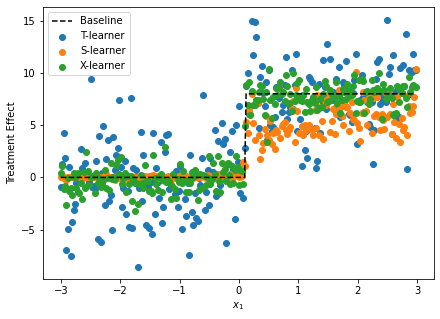

In [9]:
plt.figure(figsize=(7, 5))
plt.plot(X_test[:, 1], np.apply_along_axis(treatment_effect, 1, X_test), color='black', ls='--', label='Baseline')
plt.scatter(X_test[:, 1], T_te, label="T-learner")
plt.scatter(X_test[:, 1], S_te, label="S-learner")
plt.scatter(X_test[:, 1], X_te, label="X-learner")
plt.xlabel('$x_1$')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()

#### 6. Refrences  <a name="refrences"></a>



Künzel, Sören R. et al. “Metalearners for Estimating Heterogeneous Treatment Effects Using Machine Learning.” Proceedings of the National Academy of Sciences 116.10 (2019): 4156–4165. Crossref. Web.




##**Explanatory data analysis**

In [ ]:
# Main imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,10)})


# imports for Causalml
!pip install causalml
from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain
from causalml.metrics import plot,auuc_score
from sklearn.model_selection import train_test_split

# import for Uplifttree visualization -Causalml
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot
from IPython.display import Image, display


# imports for PyLift
!pip install pylift
import pandas as pd 
import numpy as np 
import matplotlib as mpl
import  matplotlib.pyplot as plt
from pylift import TransformedOutcome
pd.set_option('display.max_colwidth', None)

# imports for DoWhy
!pip install dowhy
# DoWhy imports 
import dowhy
from dowhy import CausalModel
from networkx.drawing.nx_pydot import to_pydot




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 3.9MB 4.4MB/s 
     |████████████████████████████████| 276kB 34.8MB/s 
     |████████████████████████████████| 1.8MB 45.1MB/s 
  Created wheel for causalml: filename=causalml-0.8.0-cp36-cp36m-linux_x86_64.whl size=482068 sha256=c1ce138184e499e35791249952c538e912d953ed262a7a07f55ac9b807b146c5
  Stored in directory: /root/.cache/pip/wheels/db/d8/1f/c5c57e0a0a1e2d597da3b4b73f26a0365874e363bb1b57db41
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394132 sha256=a11013642b1dad5b82475b3a4afca09acabbe38613c017b257f27921592c920d
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built causalml shap


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for pylift: filename=pylift-0.1.5-cp36-none-any.whl size=26030 sha256=a4e6a3ec65fdb0de28128470b6640d6f9e1753e37a80265abcba396896e8a888
  Stored in directory: /root/.cache/pip/wheels/b3/71/23/2587db6f475f0abec88ac2a48dbcf990df7502df94435a8569
Successfully built pylift
     |████████████████████████████████| 102kB 4.1MB/s 
     |████████████████████████████████| 5.8MB 7.2MB/s 
  Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [ ]:
# Read data
dataurl='https://raw.githubusercontent.com/Olesiewitch/Predictive_Analytics/master/Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge_2008.03.20.csv'
df=pd.read_csv(dataurl)


In [ ]:
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


The variables are defined as the following: 

*   **Recency**: Months since last purchase.
*   **history_segment**: Categorization of dollars spent in the past year.
*   **history**: Actual dollar value spent in the past year.
*   **mens**: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
*   **womens**: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
*   **zip_code**: Classifies zip code as Urban, Suburban, or Rural.
*   **newbie**: 1/0 indicator, 1 = New customer in the past twelve months.
*   **channel**: Describes the channels the customer purchased from in the past year.
*   **segment**: Mens E-Mail, Womens E-Mail, No E-Mail
*   **visit**: 1/0 indicator, 1 = Customer visited website in the following two weeks.
*   **conversion**:  1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
*   **spend**: Actual dollars spent in the following two weeks.







In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   recency          64000 non-null  int64   
 1   history_segment  64000 non-null  object  
 2   history          64000 non-null  float64 
 3   mens             64000 non-null  int64   
 4   womens           64000 non-null  int64   
 5   zip_code         64000 non-null  object  
 6   newbie           64000 non-null  int64   
 7   channel          64000 non-null  object  
 8   segment          64000 non-null  object  
 9   visit            64000 non-null  int64   
 10  conversion       64000 non-null  category
 11  spend            64000 non-null  float64 
 12  vist             64000 non-null  category
dtypes: category(2), float64(2), int64(5), object(4)
memory usage: 5.5+ MB


###**Univariate Distribution**

Categorical variable



In [ ]:
# Inspect Target Variable
# Target variable - spend

target=df['spend']
non_zero = target[target !=0].shape[0]
print("{}% - of samples actually spent". format(100 * non_zero / target.shape[0]))


0.903125% - of samples actually spent


From above observation, considering that the conversion rate and actual purchase rate are very small. We use **'Visit'** as our treatment effect outcome target here. (i.e we measure the effect of email campaign via if the customer visited the website or not)

In [ ]:
df.groupby("visit").mean()


,recency,history,mens,womens,newbie,spend
visit,,,,,,
0,5.872505,235.163403,0.549647,0.538988,0.517580,0.00000
1,5.131467,282.323739,0.559080,0.612093,0.413136,7.15969


**Numeric Variables**

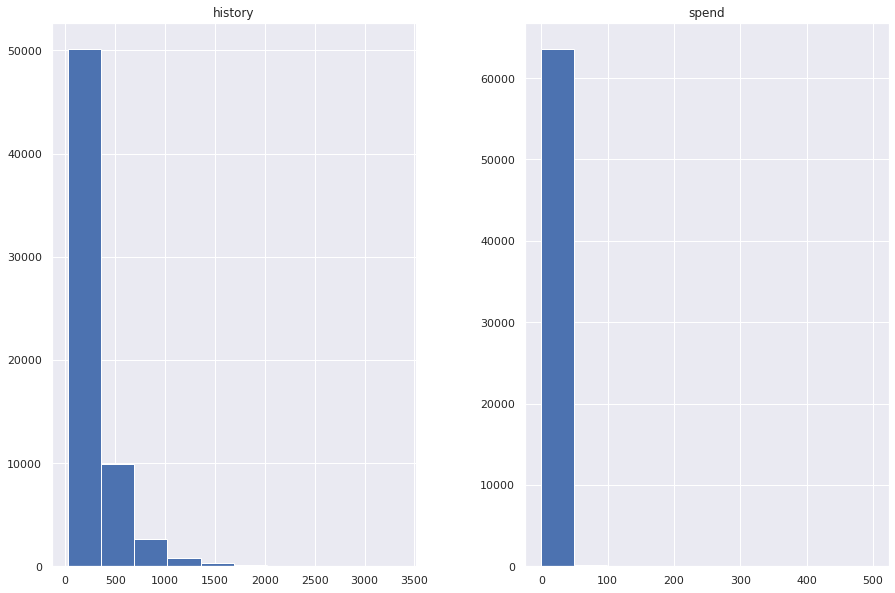

In [ ]:
df.select_dtypes(include='float64').hist();

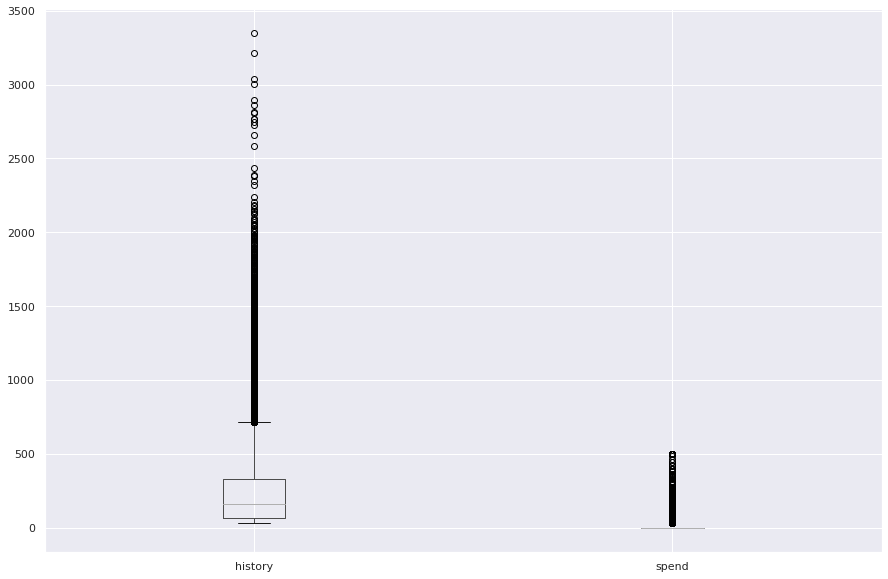

In [ ]:
df.boxplot(column=list(df.select_dtypes(include='float64')));

Multivariate 

First glance at how variable 'Segment' (the treatment) is lined to the target variable. 

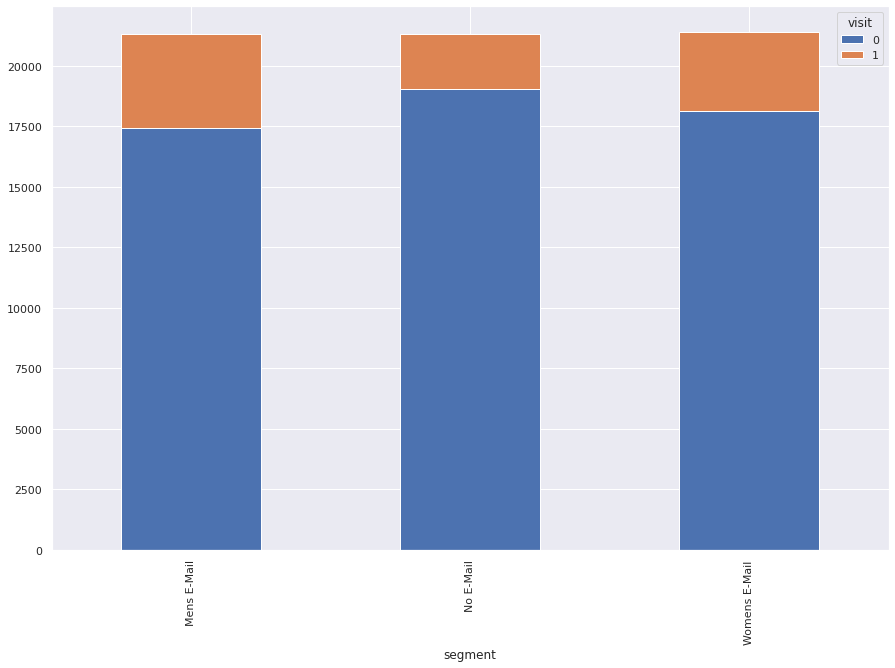

In [ ]:
segment=df.groupby(['visit','segment']).size().reset_index().pivot(columns ='visit', index='segment', values=0)
segment.plot(kind='bar', stacked=True);

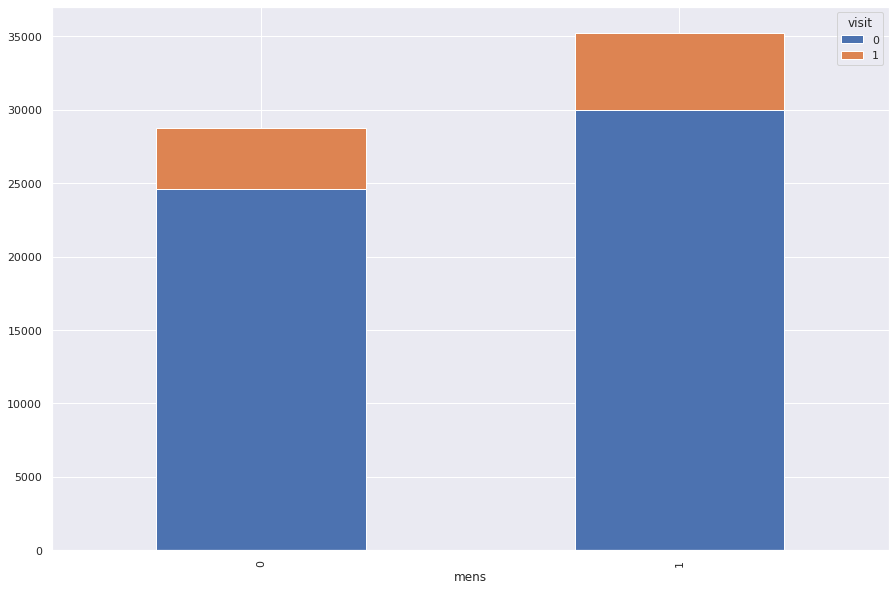

In [ ]:
mens=df.groupby(['visit','mens']).size().reset_index().pivot(columns ='visit', index='mens', values=0)

mens.plot(kind='bar', stacked=True);



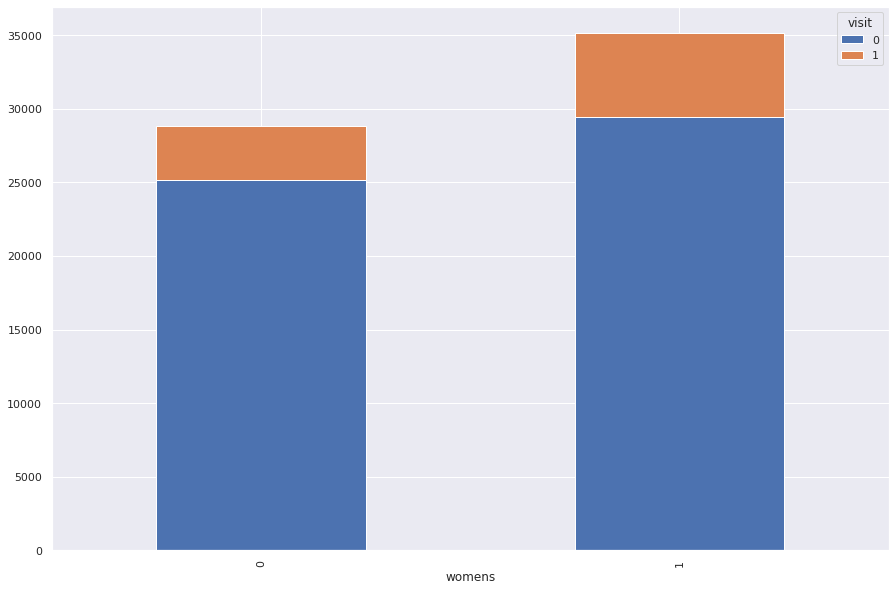

In [ ]:
womens=df.groupby(['visit','womens']).size().reset_index().pivot(columns ='visit', index='womens', values=0)
womens.plot(kind='bar', stacked=True);

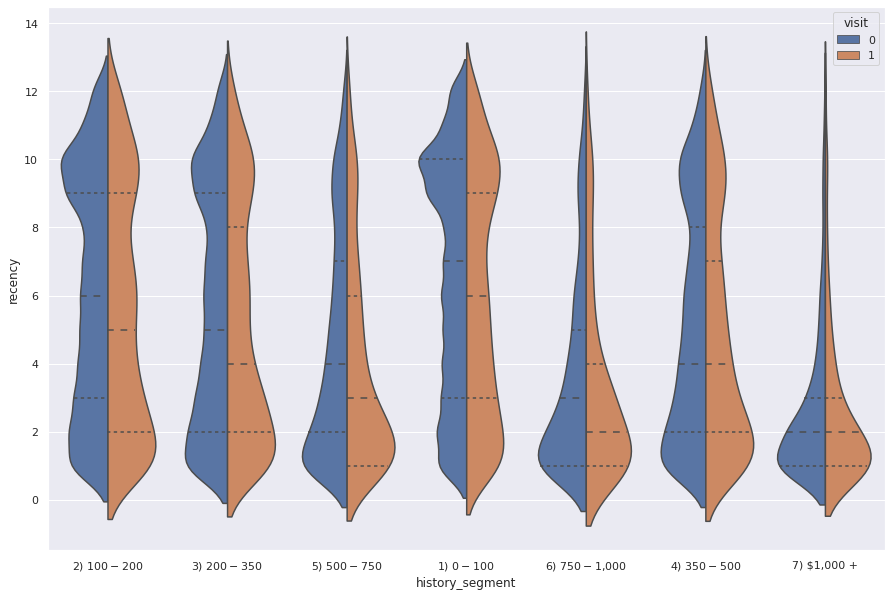

In [ ]:
plt.figure()
sns.violinplot(x='history_segment', y='recency', hue='visit',
                   split=True, inner="quart",
                   data= df, subplots=True)

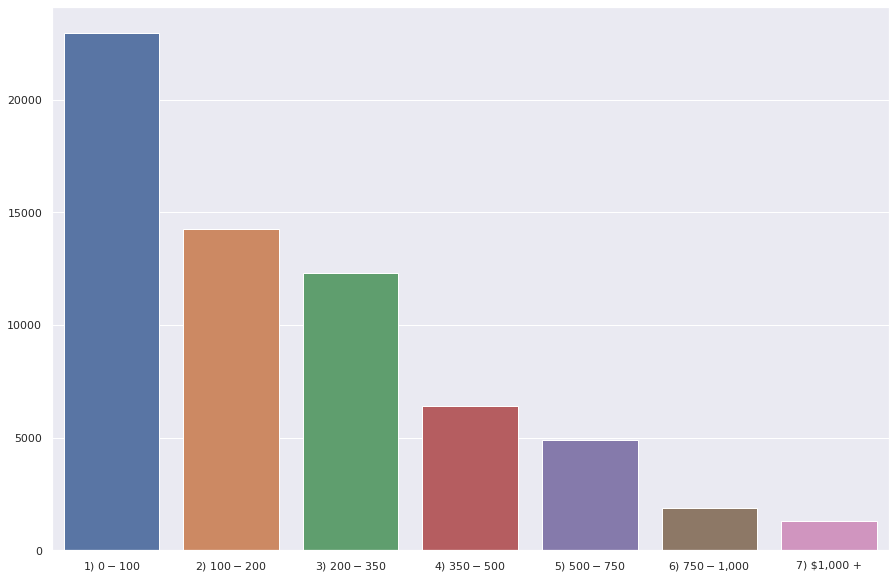

In [ ]:
# Inspect Features
# Feature: History_segment

def generate_feature_rep(values):
    feature_names = list(set(values))
    feature_names.sort()
    feature_values = []
    for feature_name in feature_names:
        value = values[values == feature_name].shape[0]
        feature_values.append(value)
    return pd.DataFrame(data={
        'Name': feature_names,
        'Value': feature_values
    })

df_rep = generate_feature_rep(df['history_segment'].values)
ax=sns.barplot(x='Name', y='Value', data=df_rep)
ax.set(xlabel='', ylabel='');

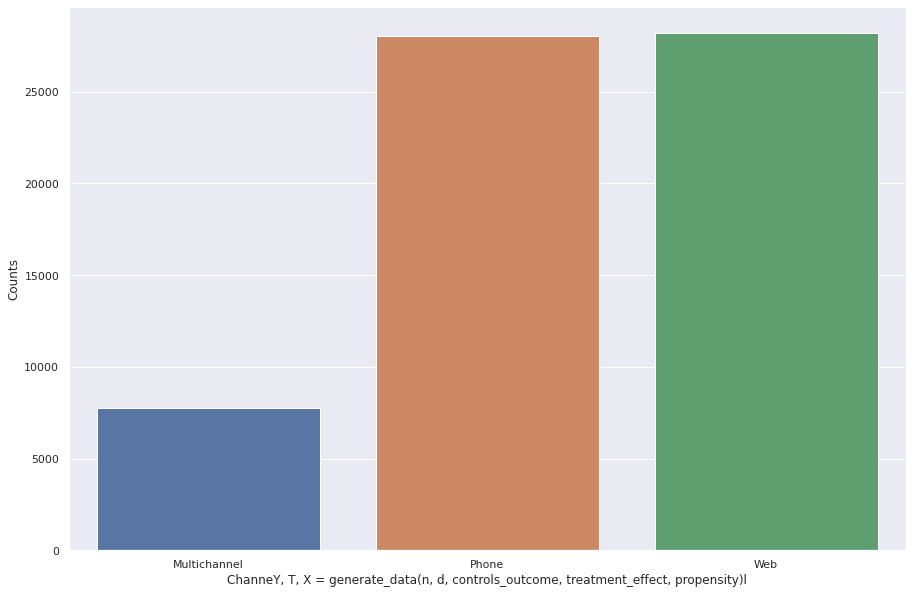

In [ ]:
df_rep = generate_feature_rep(df['channel'].values)
ax = sns.barplot(x='Name', y='Value', data=df_rep)
ax.set(xlabel='ChanneY, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)l', ylabel='Counts', title='');

 
##**Data Preparation**

In [ ]:
# Rename Columns
df=df.rename(columns={'segment':'Treatment'})

# Create dummy columns
dummy_cols= ['zip_code', 'history_segment', 'channel']
for col in dummy_cols:
  df=pd.get_dummies(df, columns=[col], prefix=col)

# Data normalization

normalization_fields=['recency','history']
df[normalization_fields]=(df[normalization_fields] - df[normalization_fields].mean())/df[normalization_fields].std()
df_2 = df.copy()

In [ ]:

# Encode the 'Treatment' column
treatment_encoder={'No E-Mail':'0', 'Mens E-Mail': '1', 'Womens E-Mail':'2'}
df['Treatment'] = df['Treatment'].apply(lambda x: treatment_encoder[x])
df.head()

In [ ]:
pd.crosstab(df['Treatment'],df['visit'], margins= True)

visit,0,1,All
Treatment,,,
0,19044,2262,21306
1,17413,3894,21307
2,18149,3238,21387
All,54606,9394,64000


In [ ]:
df.pivot_table(values=['visit', 'conversion','spend'],
               index = 'Treatment',
               aggfunc=[np.mean],
               margins = True)

mean                    
          conversion     spend     visit
Treatment                               
0           0.005726  0.652789  0.106167
1           0.012531  1.422617  0.182757
2           0.008837  1.077202  0.151400
All         0.009031  1.050908  0.146781

In [ ]:
# To drop the 'conversion' and 'spend' column 
df_red = df.drop(columns=["conversion", "spend"])
df_red.head()
df_red.shape

# **Application in CausalML**

Notes: Treatment group encoder has to be as string.Int wont work







# **Run the Uplift Random Forest classifier**
We first fit the uplift random forest classifier using training data. We then use the fitted model to make a prediction using testing data. The prediction returns an ndarray in which each column contains the predicted uplift if the unit was in the corresponding treatment group.

In [ ]:
# Split the data into training and testing samples
df_train, df_test = train_test_split(df_red, test_size = 0.3, random_state=123)
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# define X (feature)
x_names=list(df_red.drop(columns=['visit','Treatment']))
len(x_names)


In [ ]:
df_train

,recency,history,mens,womens,newbie,Treatment,visit,zip_code_Rural,zip_code_Surburban,zip_code_Urban,history_segment_1) $0 - $100,history_segment_2) $100 - $200,history_segment_3) $200 - $350,history_segment_4) $350 - $500,history_segment_5) $500 - $750,"history_segment_6) $750 - $1,000","history_segment_7) $1,000 +",channel_Multichannel,channel_Phone,channel_Web
0,0.637550,-0.470512,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,0.922646,1.466023,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2,-0.217738,-0.220432,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,-1.358121,0.456531,0,1,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1.207742,-0.399774,1,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44795,-1.358121,-0.269777,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
44796,0.922646,-0.572597,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0
44797,-1.358121,1.193028,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
44798,-0.217738,0.387667,0,1,0,2,1,0,1,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
# Fit uplift model
uplift_model =UpliftRandomForestClassifier(control_name='0')
uplift_model.fit(df_train[x_names].values,
                 treatment=df_train['Treatment'].values,
                 y = df_train['visit'].values)

In [ ]:
y_pred = uplift_model.predict(df_test[x_names].values, full_output=False)

# in Dataframe format
result=pd.DataFrame(y_pred, columns=uplift_model.classes_)
result

,1,2
0,0.078172,0.024102
1,0.093352,0.030142
2,0.056866,0.007428
3,0.060823,0.008350
4,0.072911,0.015372
...,...,...
19195,0.055242,0.008876
19196,0.070466,0.009590
19197,0.073945,0.082371
19198,0.081587,0.049754


In the case of multiple treatments the uplift model predicts the uplift for each treatment. 


# **UpliftTree Visualization**

In [ ]:
uplift_tree = uplift_model.uplift_forest[0]
uplift_tree.fill(X=df_test[x_names].values, 
                 treatment=df_test['Treatment'].values, 
                 y=df_test['visit'].values) ;

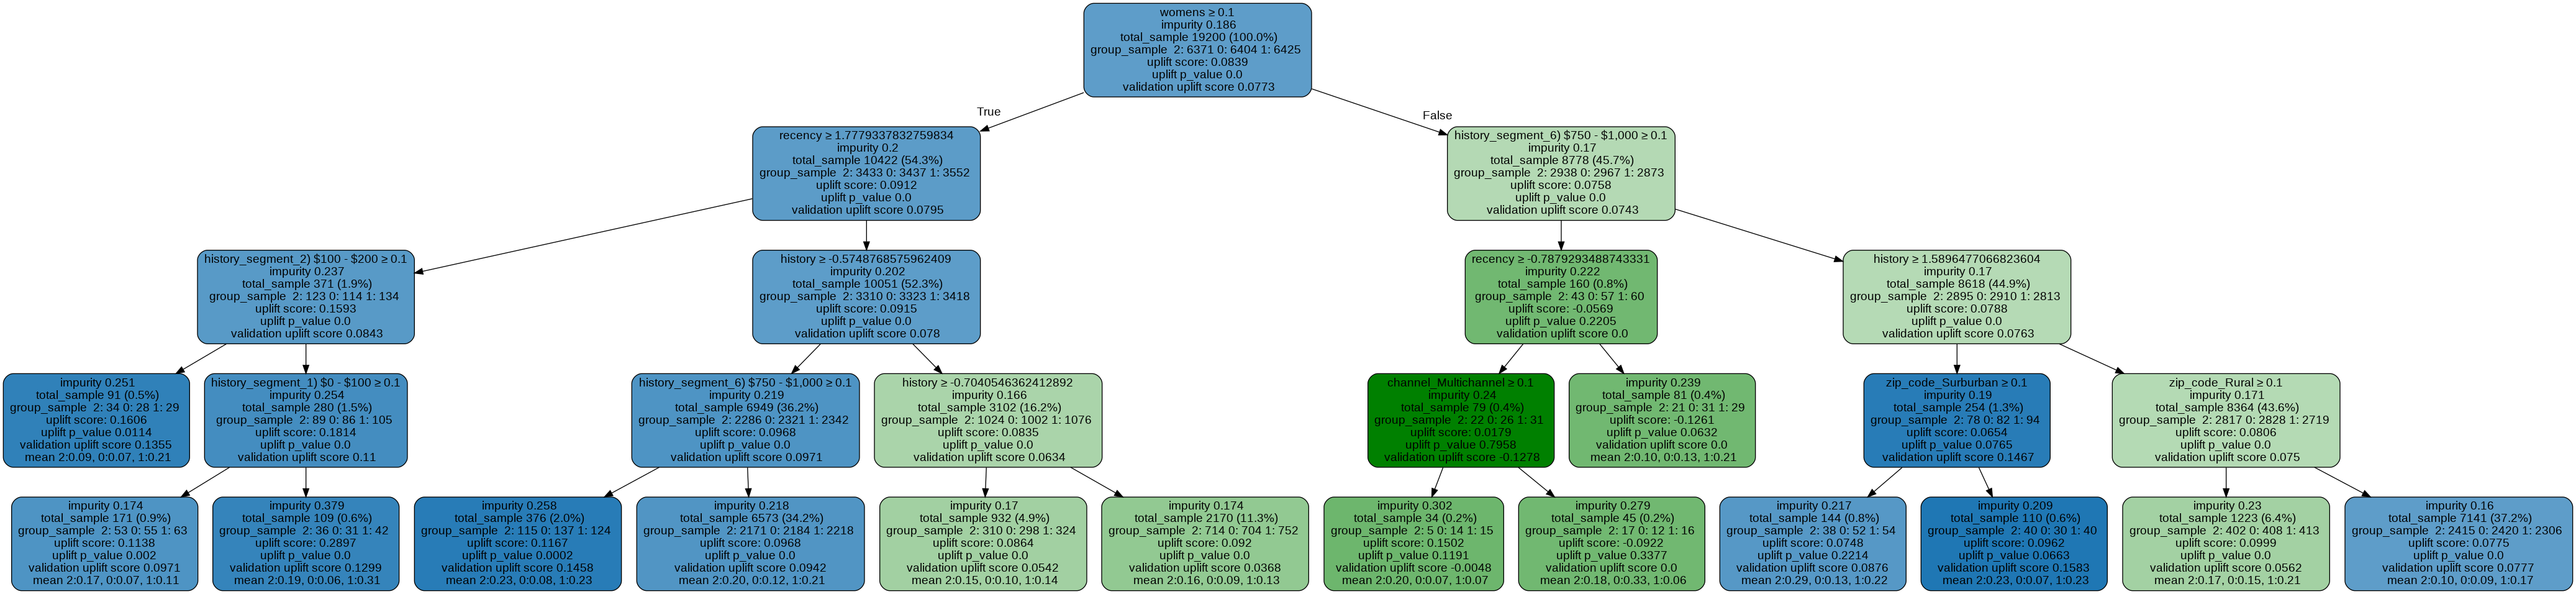

In [ ]:
graph = uplift_tree_plot(uplift_tree.fitted_uplift_tree,x_names)
Image(graph.create_png())

# **Validation**

In [ ]:
result = result.assign(Control=0.0)

max_treatment_key=pd.DataFrame(result.idxmax(axis=1))
max_treatment_key.rename(columns={0:'max_treatment_key'}, inplace=True)
max_treatment_value= pd.DataFrame(result.max(axis=1))
max_treatment_value.rename(columns={0:'max_treatment_value'}, inplace=True)

max_treatment = pd.concat([max_treatment_key, max_treatment_value], axis=1)
max_treatment


,max_treatment_key,max_treatment_value
0,1,0.078172
1,1,0.093352
2,1,0.056866
3,1,0.060823
4,1,0.072911
...,...,...
19195,1,0.055242
19196,1,0.070466
19197,2,0.082371
19198,1,0.081587


In [ ]:
result_test = pd.concat([df_test, result, max_treatment], axis=1)
result_test = result_test.loc[:,['Treatment','visit', 
                                 '1', '2', 
                                 'max_treatment_key', 'max_treatment_value']]
result_test.head(10)

,Treatment,visit,1,2,max_treatment_key,max_treatment_value
0,1,1,0.078172,0.024102,1,0.078172
1,0,0,0.093352,0.030142,1,0.093352
2,0,0,0.056866,0.007428,1,0.056866
3,1,0,0.060823,0.008350,1,0.060823
4,2,0,0.072911,0.015372,1,0.072911
5,1,0,0.084418,0.057534,1,0.084418
6,1,1,0.085979,0.034196,1,0.085979
7,2,1,0.082338,0.016998,1,0.082338
8,2,1,0.074660,0.079885,2,0.079885
9,2,0,0.079949,0.016341,1,0.079949


In [ ]:
# add one more column treatment_indictor, 0 or 1 (back to binary treatment)
result_test['treatment_indic'] =1
result_test.loc[(result_test['Treatment'] == '0'), 'treatment_indic'] =0
result_test

,Treatment,visit,1,2,max_treatment_key,max_treatment_value,treatment_indic
0,1,1,0.078172,0.024102,1,0.078172,1
1,0,0,0.093352,0.030142,1,0.093352,0
2,0,0,0.056866,0.007428,1,0.056866,0
3,1,0,0.060823,0.008350,1,0.060823,1
4,2,0,0.072911,0.015372,1,0.072911,1
...,...,...,...,...,...,...,...
19195,2,0,0.055242,0.008876,1,0.055242,1
19196,0,0,0.070466,0.009590,1,0.070466,0
19197,2,0,0.073945,0.082371,2,0.082371,1
19198,1,0,0.081587,0.049754,1,0.081587,1


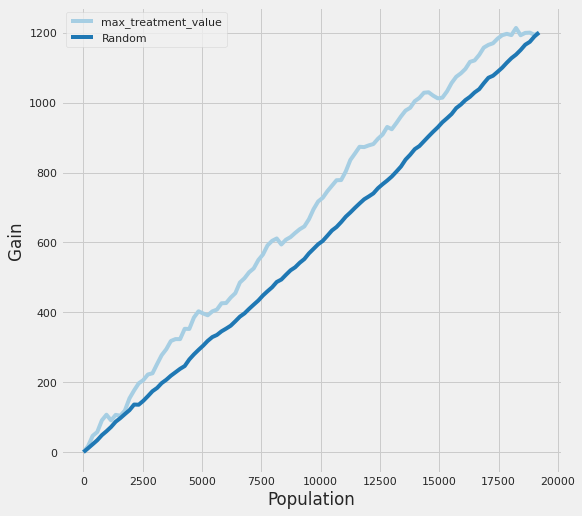

In [ ]:
plot_gain(df=result_test.loc[:,['visit','treatment_indic', 'max_treatment_value']], 
     outcome_col='visit', 
     treatment_col='treatment_indic'
    )

CausalML has the plot_gain() function which calculates the uplift curve given a DataFrame containing the treatment assignment, observed outcome and the predicted treatment effect.

The cumulative value of Lift is calculated by comparing when assigned to the treatment group where the maximum 'lift' effect can be expected (blue) and when assigned to control group (red).  
(X-axis: sample size, Y-axis: cumulative Lift value)

# **Application in PyLift**

Notes: When encoding treatment group, cannot use Str. or float. 

#**Treatment and Control Group Selection**

Hillstrom dataset has 2 treatment and 1 control groups annotated respecively:


*   0, No E-Mail
*   1, Mens E-Mail
*   2, Womens E-Mail

To analysie each treatment seperatly we split the data into two subsets accordingly. Since the pylift package requires the treatment to be marked with 1, the entries with value 2 for Woman E-mail have be re-labled

In [ ]:
# Encode the 'Treatment'
treatment_encoder = {'No E-Mail': 0, 'Mens E-Mail': 1, 'Womens E-Mail': 2}
df_2['Treatment'] = df_2['Treatment'].apply(lambda x: treatment_encoder[x])

# Split the dataset into Women Campaign and Men Campaign 
df_woman = df_2[df_2['Treatment']!= 1]
df_woman['Treatment'] = np.where(df_woman['Treatment']==2, 1, 0)
df_men = df_2[df_2['Treatment']!= 2]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_woman['Treatment'].unique()

array([1, 0])

In [ ]:
pd.crosstab(df_woman['visit'],df_woman['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,18149,37193
1,2262,3238,5500
All,21306,21387,42693


In [ ]:
pd.crosstab(df_men['visit'],df_men['Treatment'], margins= True)

Treatment,0,1,All
visit,,,
0,19044,17413,36457
1,2262,3894,6156
All,21306,21307,42613


In [ ]:
up_men = TransformedOutcome(df_men, col_treatment='Treatment', col_outcome='visit', stratify=df_men['Treatment'])

up_men.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_men.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  1.7min
ERROR:concurrent.futures:exception calling callback for <Future at 0x7f6112a037b8 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 104, in get
    if not self._poll(timeout):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 257, in poll
    return self.

KeyboardInterrupt: ignored

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


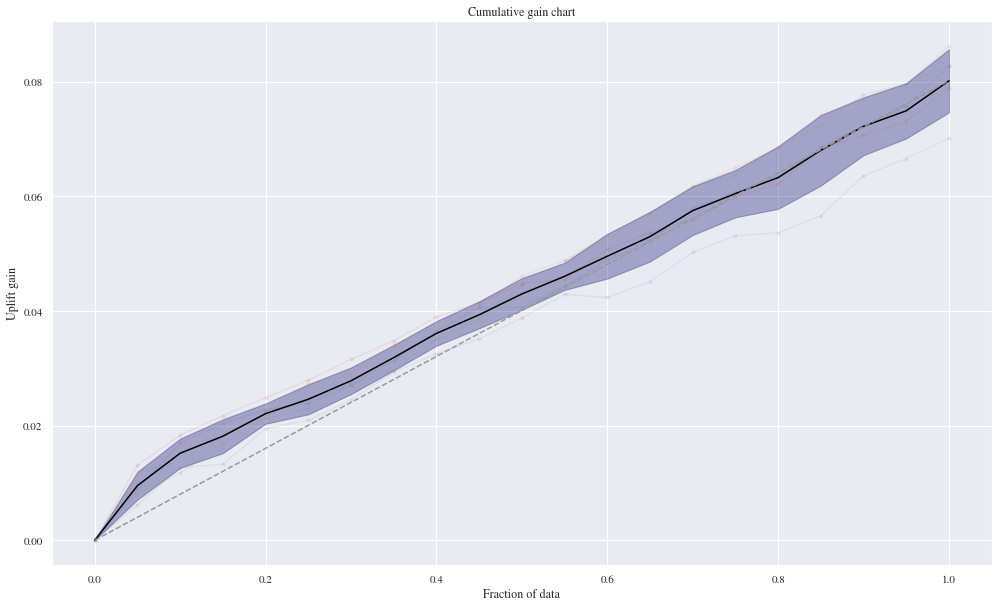

In [ ]:
#
up_men.plot(show_shuffle_fits=True);

In [ ]:
up_woman = TransformedOutcome(df_woman, col_treatment='Treatment', col_outcome='visit', stratify=df_woman['Treatment'])

up_woman.randomized_search(n_iter=20, n_jobs=10, random_state=1)

up_woman.shuffle_fit(params=up_men.rand_search_.best_params_, nthread=30, iterations=5)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed: 14.1min finished


[12:09:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 0 finished.
[12:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 1 finished.
[12:09:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 2 finished.
[12:09:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 3 finished.
[12:09:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Seed 4 finished.


{0: <pylift.methods.derivatives.TransformedOutcome at 0x7fc767059be0>,
 1: <pylift.methods.derivatives.TransformedOutcome at 0x7fc76705d7b8>,
 2: <pylift.methods.derivatives.TransformedOutcome at 0x7fc76705d978>,
 3: <pylift.methods.derivatives.TransformedOutcome at 0x7fc77b414c50>,
 4: <pylift.methods.derivatives.TransformedOutcome at 0x7fc778864668>}

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


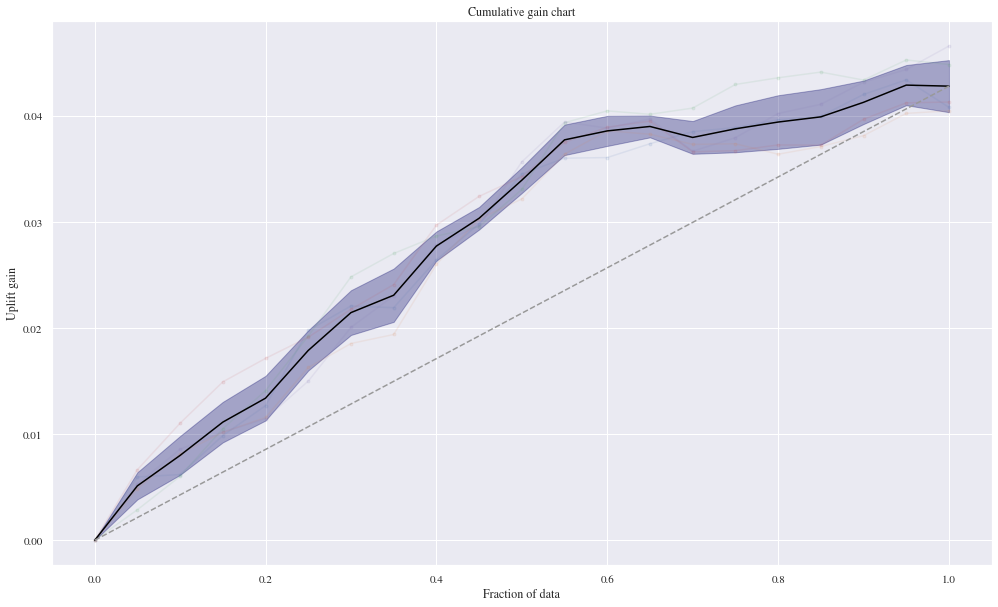

In [ ]:
up_woman.plot(show_shuffle_fits=True);


#**Interpretability of the model**

WOE and IV play two distinct roles when analyzing data:

*   WOE describes the relationship between a predictive variable and a binary target variable.
*  IV measures the strength of that relationship. (Generally, if IV<0.05 the variable has very little predictive power and will not add any meaningful predictive power to your model)



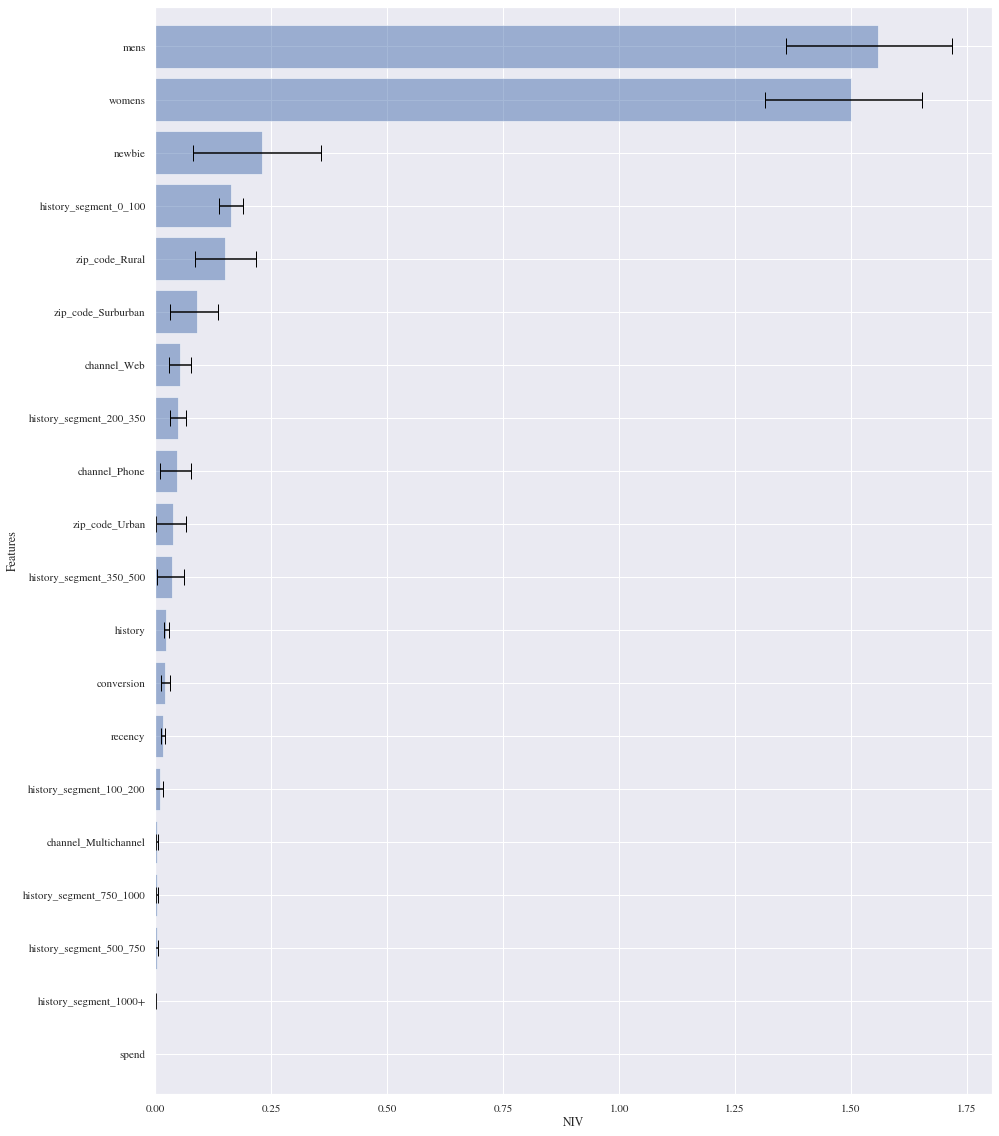

In [ ]:
up_woman.NIV()

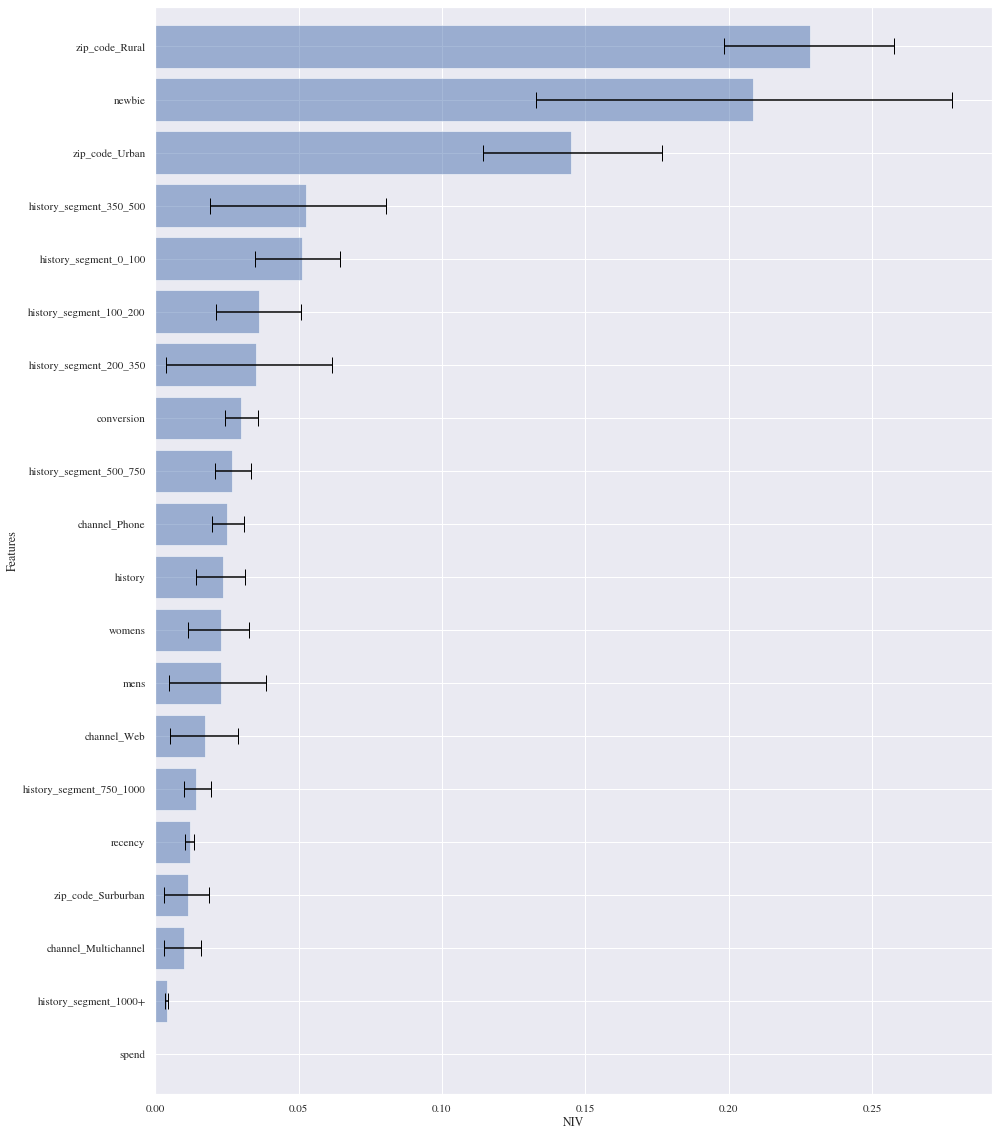

In [ ]:
up_men.NIV()

#**Application in DoWhy**

**Notes**: 1. dowhy.datasets.module, for generating sample datasets.   
2. Functionality: Refutation (used in sensitivity analysis) 
- Combine with ECONML, could test the robustness of the estimate. For example, could replace the treatment with a random(Placebo) variable or remove a random subset of the data and compare the new causal estimate with the estimated effect from the original dataset to see if the estimated effect is under the average treatment effect disitribution. 

3. Method supported: 
- Regression 
- Use propensity scores stratification
- Use propensity scores matching
- Use (inverse) propensity scores weighting
- Instrumental variable
- ...or use more advanced methods from ECONML or CausalML

     

##**Women Campaign**

In [ ]:
# For women campaign
# Define Estimator inputs

T = df_woman['Treatment']
Y = df_woman['visit']
X_women = df_woman.drop(columns=['visit','Treatment','conversion','spend'])  # Features

In [ ]:
# Create  Causal Model and Identify Causal Effect with Dowhy

feature_names = X_women.columns.tolist()

# Step1: Model problem as a causal graph

In [ ]:
model_women = CausalModel(
    data=df_woman, 
    treatment='Treatment', 
    outcome='visit', 
    common_causes=feature_names,
    effect_modifiers=feature_names
)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Treatment'] on outcome ['visit']


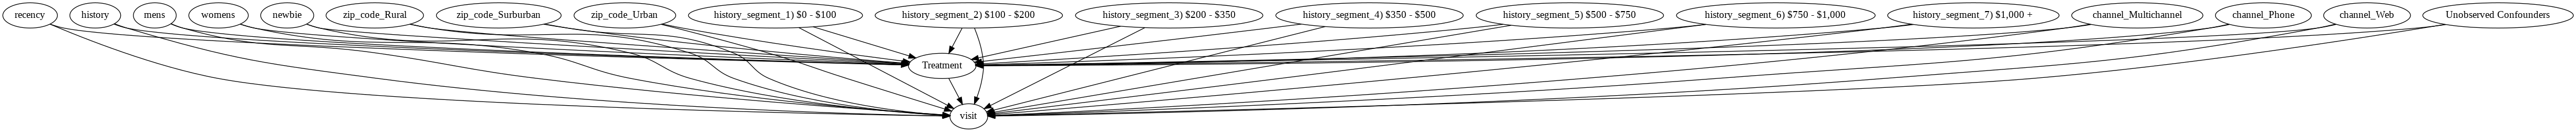

In [ ]:
# Visualize causal graph
try:
    # Try pretty printing the graph. Requires pydot and pygraphviz
    display(
        Image(to_pydot(model_women._graph._graph).create_png())
    )
except:
    # Fall back on default graph view
    model_women.view_model()

# Step2: Identify causal effect using properties of the formal causal graph.

In [ ]:



identified_estimand = model_women.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['history_segment_1) $0 - $100', 'history_segment_6) $750 - $1,000', 'channel_Multichannel', 'mens', 'history_segment_3) $200 - $350', 'channel_Web', 'zip_code_Urban', 'U', 'womens', 'zip_code_Rural', 'history_segment_5) $500 - $750', 'history_segment_7) $1,000 +', 'history_segment_4) $350 - $500', 'channel_Phone', 'newbie', 'recency', 'history', 'history_segment_2) $100 - $200', 'zip_code_Surburban']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(visit|history_segment_1) $0 - $100,history_segment_6)
d[Treatment]                                                                  

                                                                              
 $750 - $1,000,channel_Multichannel,mens,history_segment_3) $200 - $350,channe
                                                                              

                                                                              
l_Web,zip_code_Urban,womens,zip_code_Rural,history_segment_5) $500 - $750,hist
                                                                              

                                                                              
ory_segment_7) $1,000 +,history_segment_4) $350 - $500,channel_Phone,newbie,re
                                 

# Step3: Estimate the causal effect

- use any statistical method to estimate the causal effect. The library does not play a role here


`

In [ ]:
linear_estimate = model_women.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=0,
                                       treatment_value=1,
                                       method_params={'need_conditional_estimates': False})
print(linear_estimate)

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: visit~Treatment+history_segment_1) $0 - $100+history_segment_6) $750 - $1,000+channel_Multichannel+mens+history_segment_3) $200 - $350+channel_Web+zip_code_Urban+womens+zip_code_Rural+history_segment_5) $500 - $750+history_segment_7) $1,000 ++history_segment_4) $350 - $500+channel_Phone+newbie+recency+history+history_segment_2) $100 - $200+zip_code_Surburban+Treatment*recency+Treatment*history+Treatment*mens+Treatment*womens+Treatment*newbie+Treatment*zip_code_Rural+Treatment*zip_code_Surburban+Treatment*zip_code_Urban+Treatment*history_segment_1) $0 - $100+Treatment*history_segment_2) $100 - $200+Treatment*history_segment_3) $200 - $350+Treatment*history_segment_4) $350 - $500+Treatment*history_segment_5) $500 - $750+Treatment*history_segment_6) $750 - $1,000+Treatment*history_segment_7) $1,000 ++Treatment*channel_Multichannel+Treatment*channel_Phone+Treatment*channel_Web


                            OLS Regression Results                            
Dep. Variable:                  visit   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     47.17
Date:                Sat, 01 Aug 2020   Prob (F-statistic):          3.66e-283
Time:                        17:57:50   Log-Likelihood:                -13170.
No. Observations:               42693   AIC:                         2.640e+04
Df Residuals:                   42661   BIC:                         2.668e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.588e+10   4.13e+10      0.626      0.5


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(visit|history_segment_1) $0 - $100,history_segment_6)
d[Treatment]                                                                  

                                                                              
 $750 - $1,000,channel_Multichannel,mens,history_segment_3) $200 - $350,channe
                                                                              

                                                                              
l_Web,zip_code_Urban,womens,zip_code_Rural,history_segment_5) $500 - $750,hist
                                                                              

                                                                              
ory_segment_7) $1,000 +,history_segment_4) $350 - $500,channel_P

# Step4: Refute: Senstivity analysis 
* to refute the obtained estimate: adding random common cause variable, replace treatment with placebo variable, remove a random subset etc.

##**Men Campaign**

In [ ]:
# Define Estimator inputs

T_Men = df_men['Treatment']
Y_Men = df_men['visit']
X_men = df_men.drop(columns=['visit','Treatment','conversion','spend']) # Features**Men campaign**

feature_names_Men = X_men.columns.tolist()

In [ ]:
model_men = CausalModel(
    data=df_men, 
    treatment='Treatment', 
    outcome='visit', 
    common_causes=feature_names_Men,
    effect_modifiers=feature_names_Men
)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Treatment'] on outcome ['visit']


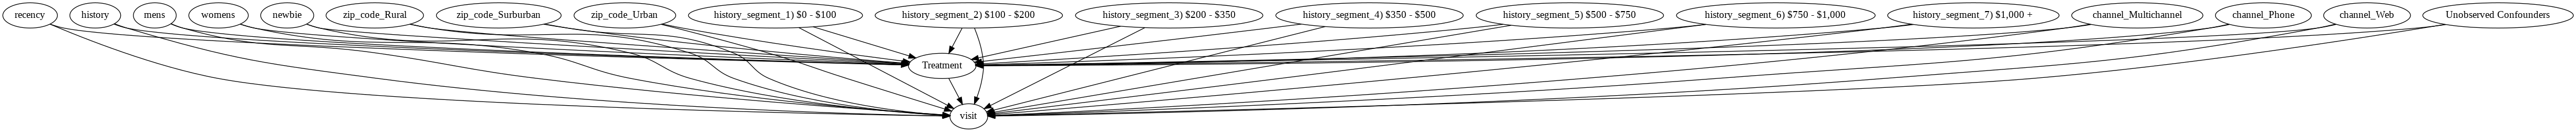

In [ ]:
# Visualize causal graph
try:
    # Try pretty printing the graph. Requires pydot and pygraphviz
    display(
        Image(to_pydot(model_men._graph._graph).create_png())
    )
except:
    # Fall back on default graph view
    model_men.view_model()

In [ ]:
identified_estimand_men = model_men.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_men)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['history_segment_1) $0 - $100', 'history_segment_6) $750 - $1,000', 'channel_Multichannel', 'mens', 'history_segment_3) $200 - $350', 'channel_Web', 'zip_code_Urban', 'U', 'womens', 'zip_code_Rural', 'history_segment_5) $500 - $750', 'history_segment_7) $1,000 +', 'history_segment_4) $350 - $500', 'channel_Phone', 'newbie', 'recency', 'history', 'history_segment_2) $100 - $200', 'zip_code_Surburban']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
────────────(Expectation(visit|history_segment_1) $0 - $100,history_segment_6)
d[Treatment]                                                                  

                                                                              
 $750 - $1,000,channel_Multichannel,mens,history_segment_3) $200 - $350,channe
                                                                              

                                                                              
l_Web,zip_code_Urban,womens,zip_code_Rural,history_segment_5) $500 - $750,hist
                                                                              

                                                                              
ory_segment_7) $1,000 +,history_segment_4) $350 - $500,channel_Phone,newbie,re
                                 